Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_2341.jpeg:
Boxes: tensor([[  0.6049, 149.9261, 132.0000, 197.8941],
        [  0.7214, 150.3716, 132.0000, 197.7698],
        [  8.8768, 109.6175, 132.0000, 198.0000],
        [ 27.1746,  64.5984,  68.3164, 102.6183],
        [ 33.0475,  67.5968,  65.3721,  99.9180],
        [  1.0938,   2.4443, 122.3621,  60.9886],
        [  8.1225, 108.8362, 132.0000, 197.9728],
        [  0.0000, 150.1239, 132.0000, 197.6762],
        [  5.5186,   0.0000, 132.0000, 115.0751],
        [  2.9090,   0.0000, 132.0000, 115.5175],
        [ 10.3753,   0.8293, 132.0000, 113.2146]])
Labels: tensor([51, 67, 63,  1, 70, 51,  3, 81,  3, 63, 51])
Scores: tensor([0.1645, 0.1599, 0.1316, 0.1126, 0.1063, 0.1029, 0.1005, 0.0997, 0.0879,
        0.0807, 0.0788])


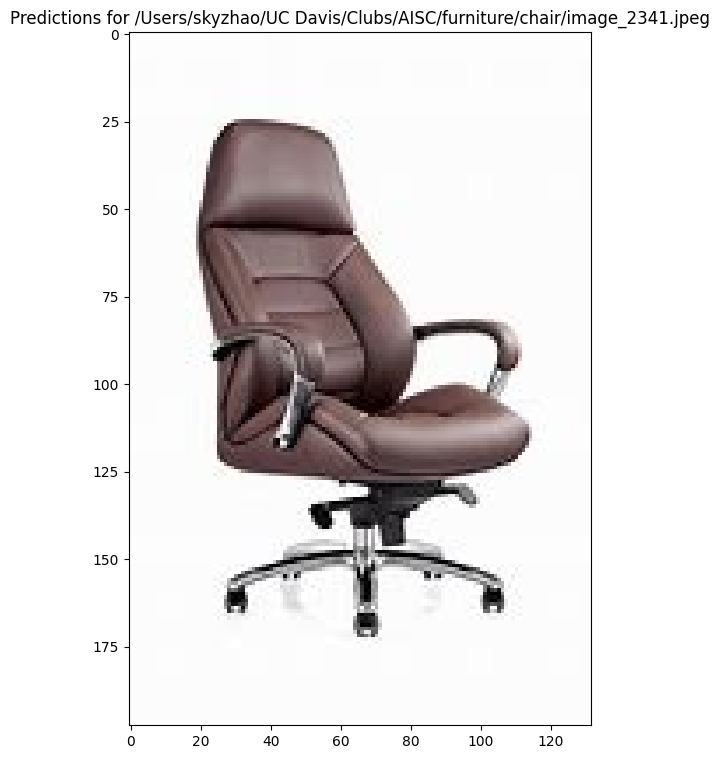

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_947.jpeg:
Boxes: tensor([[ 59.5605,   0.0000, 207.0000, 123.3051],
        [ 10.9243, 131.1827, 206.8904, 207.0000],
        [  4.3977, 130.8359, 207.0000, 207.0000],
        [  0.0000, 131.1535, 207.0000, 206.9807],
        [  0.4250, 121.4130, 207.0000, 207.0000],
        [  6.5459, 118.7593, 207.0000, 207.0000]])
Labels: tensor([ 3, 51, 81, 67, 63,  3])
Scores: tensor([0.1089, 0.0898, 0.0849, 0.0734, 0.0614, 0.0541])


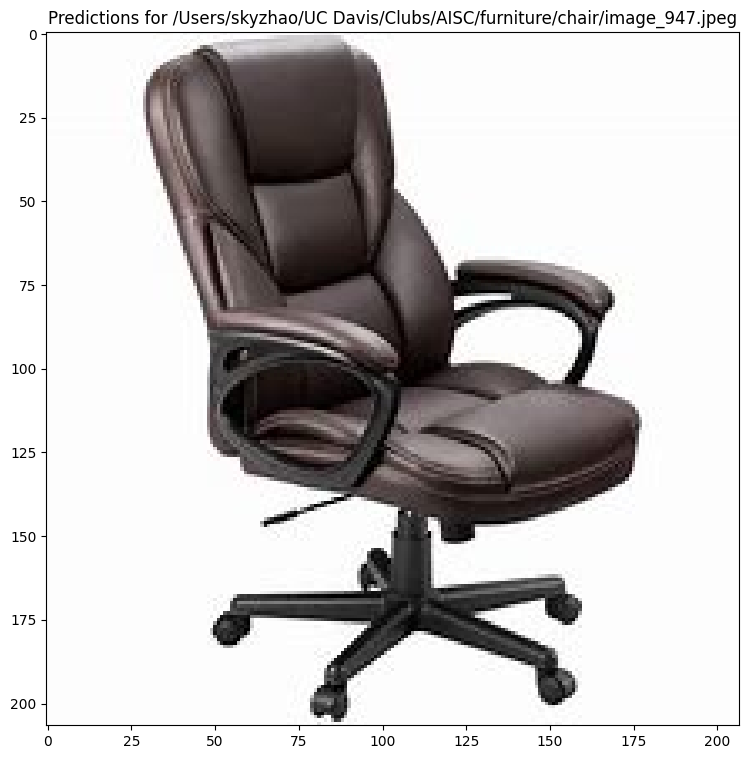

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_1994.jpeg:
Boxes: tensor([[4.1960e+00, 4.1870e+00, 1.1156e+02, 6.7316e+01],
        [3.2805e+00, 1.4217e+02, 1.5000e+02, 2.0000e+02],
        [3.8896e+01, 0.0000e+00, 1.5000e+02, 8.8271e+01],
        [3.5247e-01, 1.3506e+02, 1.5000e+02, 2.0000e+02],
        [4.7647e+00, 1.4150e+02, 1.5000e+02, 2.0000e+02],
        [0.0000e+00, 1.1224e+02, 1.4897e+02, 2.0000e+02],
        [1.5126e+00, 1.1737e+02, 8.8977e+01, 2.0000e+02],
        [1.4753e-01, 1.4142e+02, 1.5000e+02, 2.0000e+02],
        [7.3028e-01, 1.1307e+02, 9.4017e+01, 2.0000e+02],
        [0.0000e+00, 6.3465e+01, 1.0125e+02, 2.0000e+02]])
Labels: tensor([51, 67,  3, 63, 51,  3, 17, 81, 62,  3])
Scores: tensor([0.1520, 0.1075, 0.1040, 0.1023, 0.1002, 0.0795, 0.0785, 0.0661, 0.0629,
        0.0514])


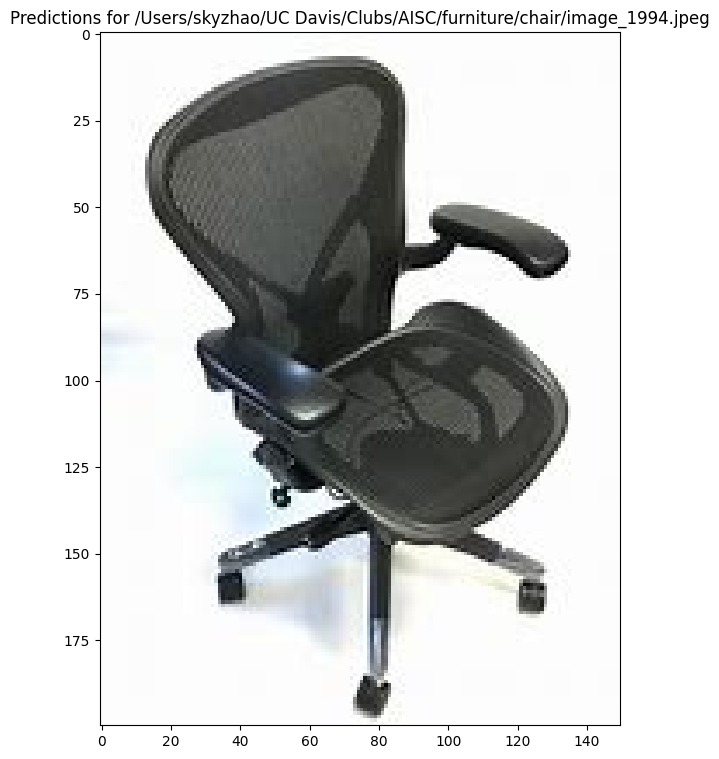

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_2711.jpeg:
Boxes: tensor([[ 79.3824,  95.5308, 102.8225, 116.0205],
        [ 86.8094, 160.3298,  96.2195, 174.6595],
        [ 52.4306,  89.5879, 186.0000, 185.8375],
        [  2.6467, 100.4505, 186.0000, 185.2906],
        [ 73.2807,   0.0000, 186.0000, 112.8570],
        [ 48.3063,  91.1201, 186.0000, 186.0000],
        [ 75.6200,  76.2135, 186.0000, 186.0000],
        [  0.0000,  81.8573, 138.6403, 185.0607],
        [ 98.8065,   0.9313, 186.0000, 143.7423]])
Labels: tensor([ 3, 10,  3, 67,  3, 63,  1,  3, 51])
Scores: tensor([0.4677, 0.3768, 0.1245, 0.1143, 0.1140, 0.0736, 0.0614, 0.0550, 0.0503])


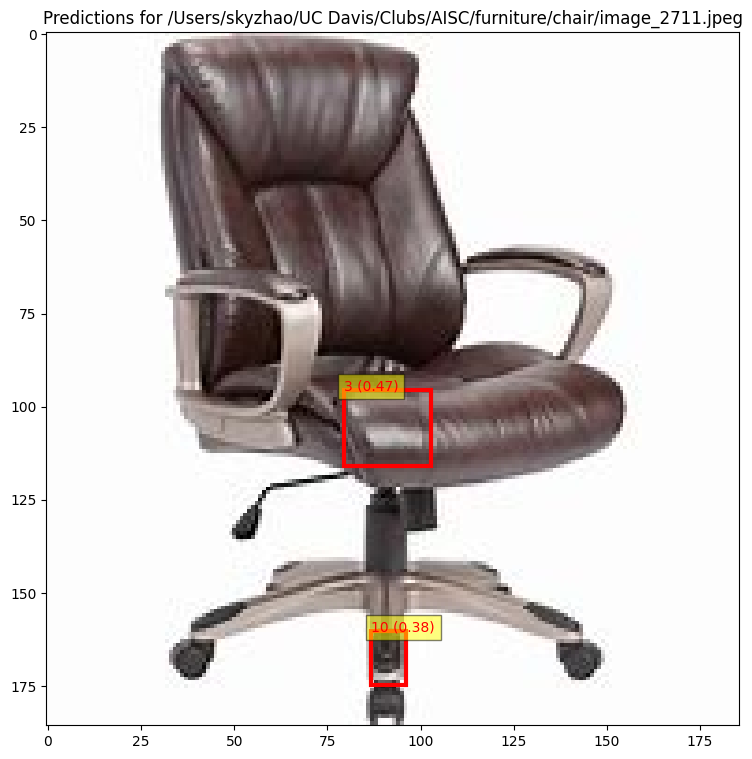

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_1097.jpeg:
Boxes: tensor([[ 10.3025,   0.0000, 188.0000, 135.5379],
        [ 74.5389,   0.4414, 188.0000, 100.3199]])
Labels: tensor([ 1, 63])
Scores: tensor([0.2928, 0.0535])


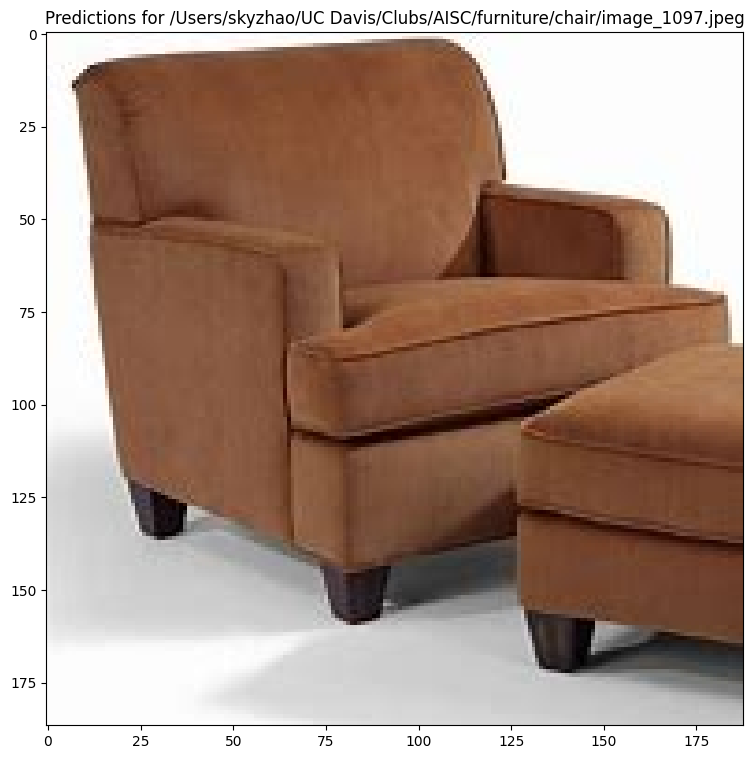

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_414.jpeg:
Boxes: tensor([[ 68.6186, 148.2845, 114.7559, 191.3078],
        [171.9923, 116.8472, 196.0000, 165.8199],
        [111.4106, 144.5977, 192.4414, 192.7986],
        [157.3817,  68.1750, 168.7034,  80.5183]])
Labels: tensor([15, 15, 15,  3])
Scores: tensor([0.8551, 0.4545, 0.1697, 0.1321])


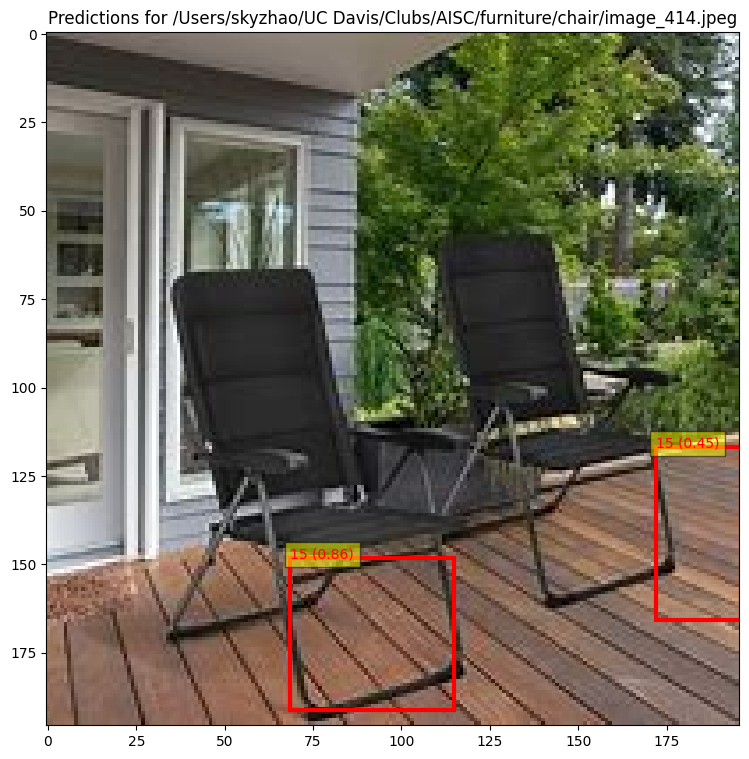

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_101.jpeg:
Boxes: tensor([[ 84.9383,   0.0000, 225.0000, 112.6493],
        [ 62.8455,   0.0000, 181.8725, 119.2982],
        [  0.0000, 144.5362, 225.0000, 220.0000],
        [ 10.4956, 145.7468, 220.3716, 220.0000],
        [ 94.2065,  58.5103, 225.0000, 220.0000],
        [ 96.4936,   0.0000, 225.0000, 154.7894],
        [  2.7060, 144.8365, 225.0000, 220.0000],
        [  0.0000,   0.0000, 116.5432, 140.0525]])
Labels: tensor([ 3,  1, 67, 51,  3, 63, 81,  3])
Scores: tensor([0.1357, 0.0825, 0.0807, 0.0676, 0.0597, 0.0565, 0.0520, 0.0506])


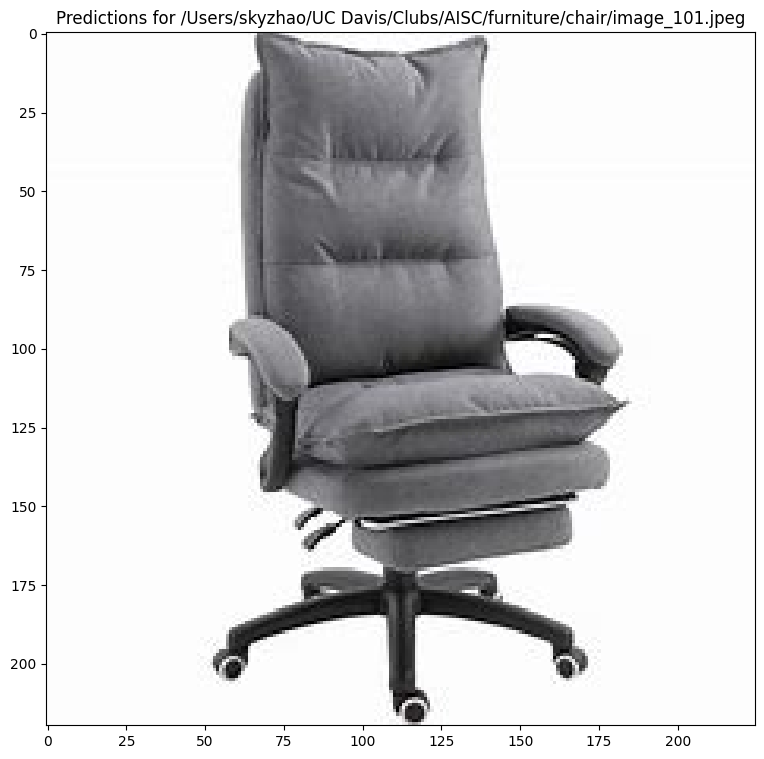

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_1428.jpeg:
Boxes: tensor([[191.7799, 184.0435, 206.1082, 196.6130],
        [142.9260, 137.9547, 165.1326, 155.6167],
        [  0.0000,  97.8436, 138.9427, 212.1743]])
Labels: tensor([10,  3, 81])
Scores: tensor([0.3514, 0.0836, 0.0529])


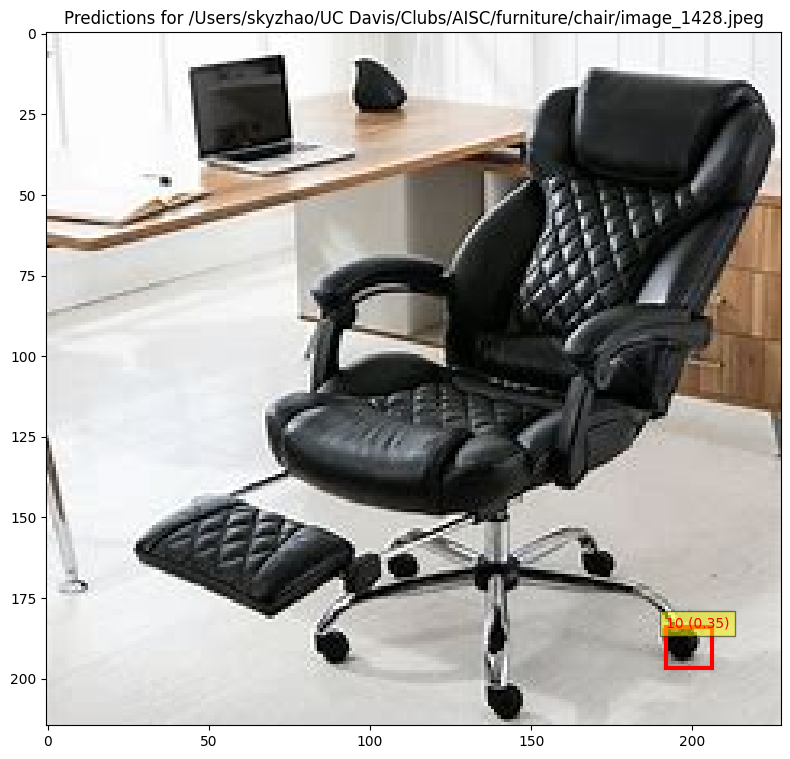

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_551.jpeg:
Boxes: tensor([[132.1681,  57.5871, 187.3646,  87.0712],
        [ 33.5459,  67.6400, 196.0000, 159.9086],
        [ 36.9911, 108.3913, 196.0000, 191.3940]])
Labels: tensor([ 3,  3, 81])
Scores: tensor([0.1120, 0.0863, 0.0665])


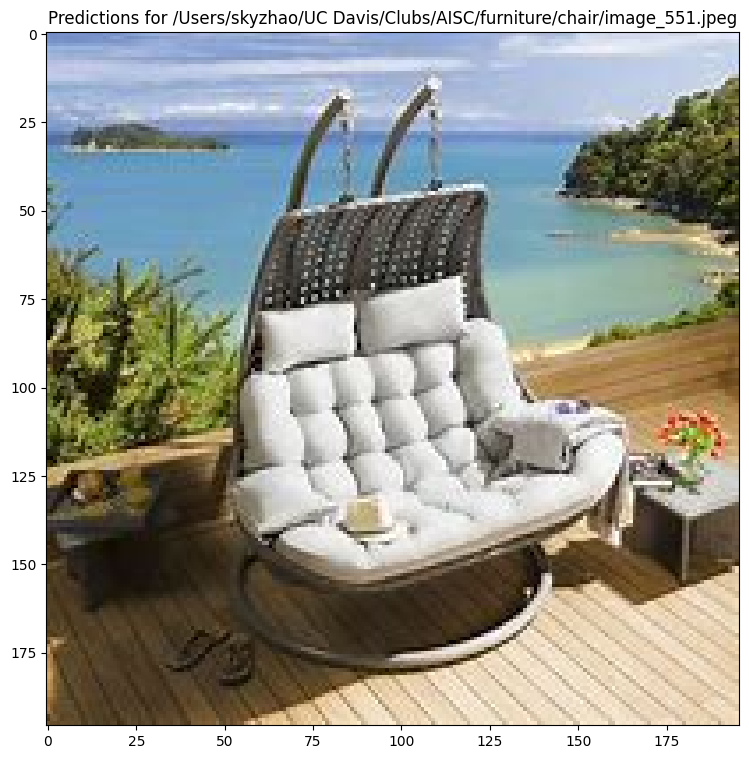

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_1582.jpeg:
Boxes: tensor([[5.4500e+00, 1.0435e+02, 1.9800e+02, 1.9796e+02],
        [0.0000e+00, 1.0405e+02, 1.9800e+02, 1.9790e+02],
        [0.0000e+00, 9.2030e+01, 1.9800e+02, 1.9782e+02],
        [1.7995e-01, 1.0404e+02, 1.9800e+02, 1.9800e+02],
        [0.0000e+00, 6.8289e+01, 1.9800e+02, 1.9800e+02],
        [1.5234e+02, 1.6403e+02, 1.6335e+02, 1.7748e+02]])
Labels: tensor([51, 67, 63, 81,  3, 10])
Scores: tensor([0.1181, 0.1036, 0.0997, 0.0927, 0.0779, 0.0581])


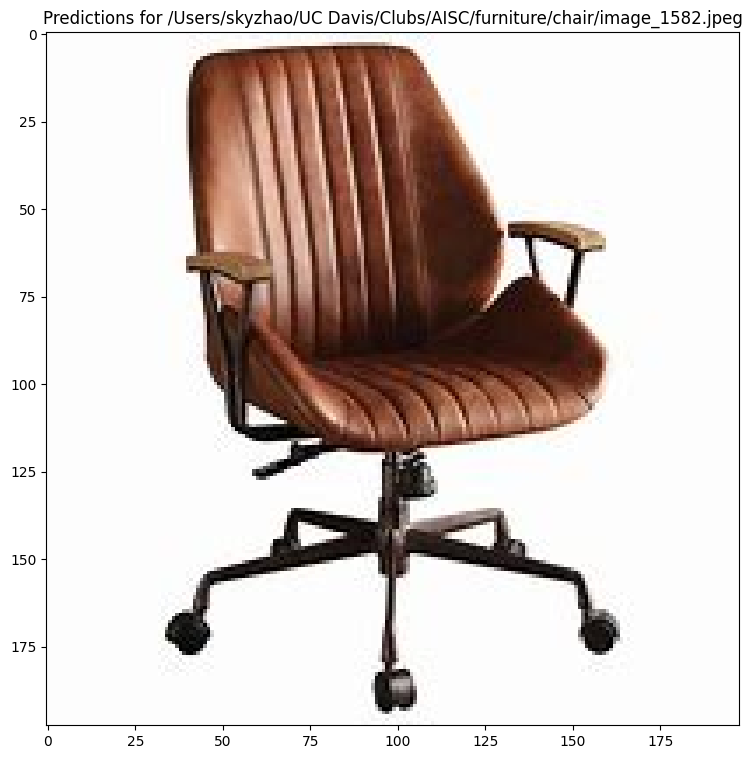

In [2]:
import os
import torch
from torchvision import models, transforms
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from PIL import Image
import matplotlib.pyplot as plt

# Define the base directory where your images are stored
base_dir = '/Users/skyzhao/UC Davis/Clubs/AISC/furniture'  # Modify this path to your folder location

# Define transformation for Faster R-CNN input
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the Faster R-CNN model (pretrained)
model = models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()  # Set model to evaluation mode

# Function to load and transform images
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Open image and convert to RGB
    return transform(image).unsqueeze(0)  # Add batch dimension

# Function to recursively find all image files in the directory
def get_all_images(base_dir):
    image_paths = []
    for root, dirs, files in os.walk(base_dir):  # Traverse through subdirectories
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Ensure it's an image
                image_paths.append(os.path.join(root, file))
    return image_paths

def run_inference(base_dir, max_images=10):
    image_paths = get_all_images(base_dir)[:max_images]  # Limit to the first 'max_images' images
    for image_path in image_paths:
        image_tensor = load_image(image_path)
        
        with torch.no_grad():  # Inference without gradient calculation
            prediction = model(image_tensor)  # Run Faster R-CNN
            
        # Get predicted boxes, labels, and scores
        boxes = prediction[0]['boxes']
        labels = prediction[0]['labels']
        scores = prediction[0]['scores']
        
        print(f"Predictions for {image_path}:")
        print(f"Boxes: {boxes}")
        print(f"Labels: {labels}")
        print(f"Scores: {scores}")
        
        # Display results (if confident enough)
        fig, ax = plt.subplots(1, figsize=(12,9))
        ax.imshow(Image.open(image_path))
        
        for i in range(len(boxes)):
            if scores[i] > 0.3:  # Lowered the confidence threshold
                box = boxes[i].cpu().numpy()
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                           fill=False, color='red', linewidth=3))
                ax.text(box[0], box[1], f'{labels[i].item()} ({scores[i]:.2f})',
                        fontsize=10, color='red', bbox=dict(facecolor='yellow', alpha=0.5))
        
        plt.title(f"Predictions for {image_path}")
        plt.show()

# Run inference on the first 10 images
run_inference(base_dir, max_images=10)


Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_2341.jpeg:
Boxes: tensor([[  0.6049, 149.9261, 132.0000, 197.8941],
        [  0.7214, 150.3716, 132.0000, 197.7698],
        [  8.8768, 109.6175, 132.0000, 198.0000],
        [ 27.1746,  64.5984,  68.3164, 102.6183],
        [ 33.0475,  67.5968,  65.3721,  99.9180],
        [  1.0938,   2.4443, 122.3621,  60.9886],
        [  8.1225, 108.8362, 132.0000, 197.9728],
        [  0.0000, 150.1239, 132.0000, 197.6762],
        [  5.5186,   0.0000, 132.0000, 115.0751],
        [  2.9090,   0.0000, 132.0000, 115.5175],
        [ 10.3753,   0.8293, 132.0000, 113.2146]])
Labels: tensor([51, 67, 63,  1, 70, 51,  3, 81,  3, 63, 51])
Scores: tensor([0.1645, 0.1599, 0.1316, 0.1126, 0.1063, 0.1029, 0.1005, 0.0997, 0.0879,
        0.0807, 0.0788])


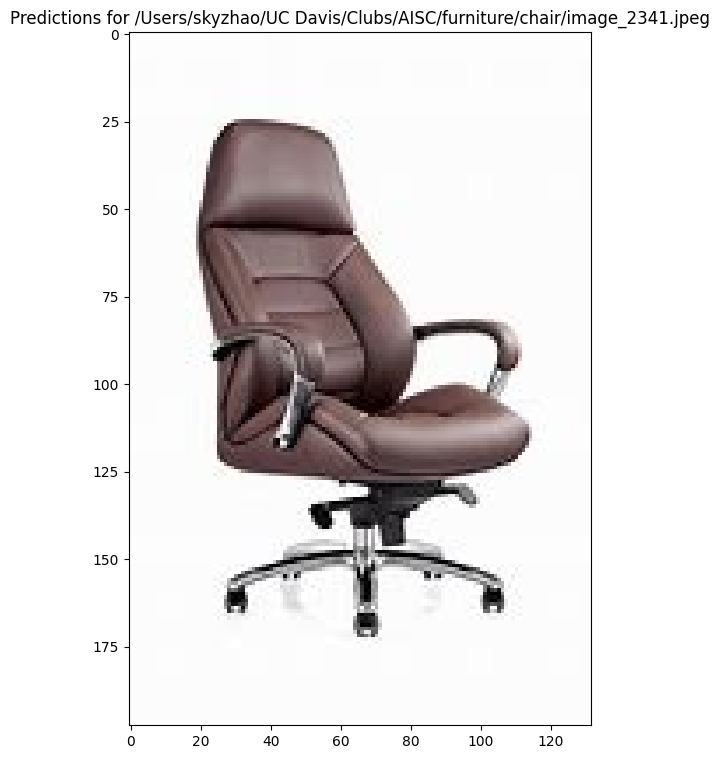

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_947.jpeg:
Boxes: tensor([[ 59.5605,   0.0000, 207.0000, 123.3051],
        [ 10.9243, 131.1827, 206.8904, 207.0000],
        [  4.3977, 130.8359, 207.0000, 207.0000],
        [  0.0000, 131.1535, 207.0000, 206.9807],
        [  0.4250, 121.4130, 207.0000, 207.0000],
        [  6.5459, 118.7593, 207.0000, 207.0000]])
Labels: tensor([ 3, 51, 81, 67, 63,  3])
Scores: tensor([0.1089, 0.0898, 0.0849, 0.0734, 0.0614, 0.0541])


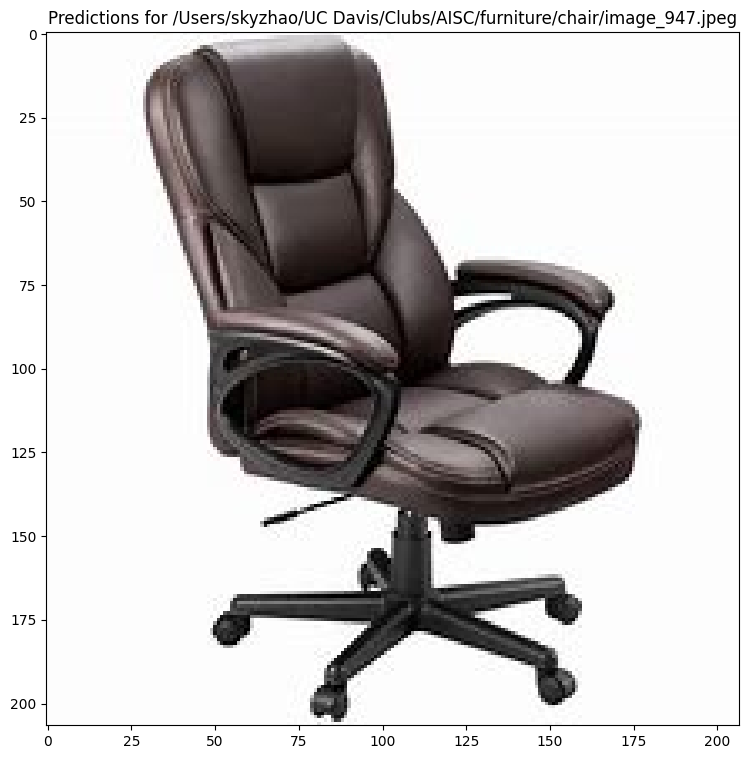

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_1994.jpeg:
Boxes: tensor([[4.1960e+00, 4.1870e+00, 1.1156e+02, 6.7316e+01],
        [3.2805e+00, 1.4217e+02, 1.5000e+02, 2.0000e+02],
        [3.8896e+01, 0.0000e+00, 1.5000e+02, 8.8271e+01],
        [3.5247e-01, 1.3506e+02, 1.5000e+02, 2.0000e+02],
        [4.7647e+00, 1.4150e+02, 1.5000e+02, 2.0000e+02],
        [0.0000e+00, 1.1224e+02, 1.4897e+02, 2.0000e+02],
        [1.5126e+00, 1.1737e+02, 8.8977e+01, 2.0000e+02],
        [1.4753e-01, 1.4142e+02, 1.5000e+02, 2.0000e+02],
        [7.3028e-01, 1.1307e+02, 9.4017e+01, 2.0000e+02],
        [0.0000e+00, 6.3465e+01, 1.0125e+02, 2.0000e+02]])
Labels: tensor([51, 67,  3, 63, 51,  3, 17, 81, 62,  3])
Scores: tensor([0.1520, 0.1075, 0.1040, 0.1023, 0.1002, 0.0795, 0.0785, 0.0661, 0.0629,
        0.0514])


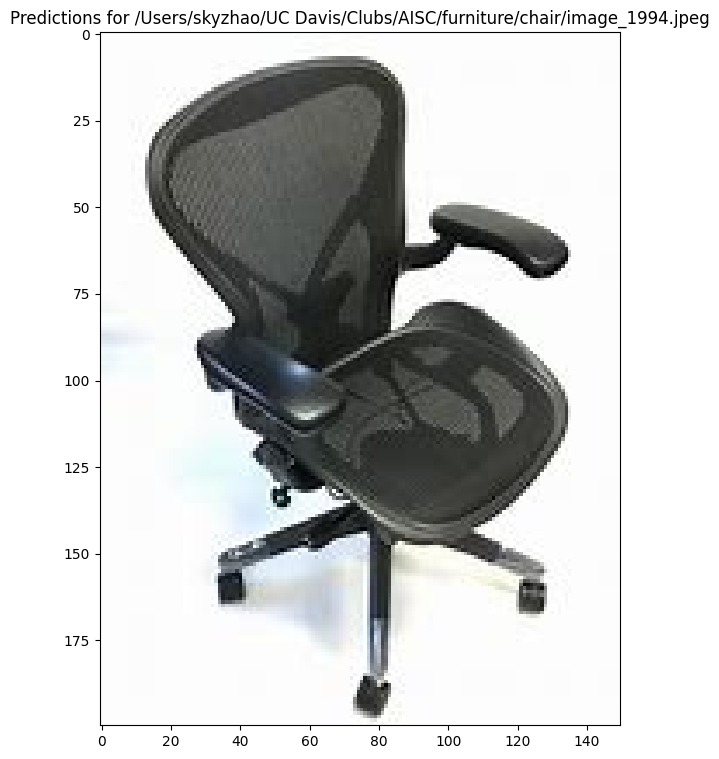

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_2711.jpeg:
Boxes: tensor([[ 79.3824,  95.5308, 102.8225, 116.0205],
        [ 86.8094, 160.3298,  96.2195, 174.6595],
        [ 52.4306,  89.5879, 186.0000, 185.8375],
        [  2.6467, 100.4505, 186.0000, 185.2906],
        [ 73.2807,   0.0000, 186.0000, 112.8570],
        [ 48.3063,  91.1201, 186.0000, 186.0000],
        [ 75.6200,  76.2135, 186.0000, 186.0000],
        [  0.0000,  81.8573, 138.6403, 185.0607],
        [ 98.8065,   0.9313, 186.0000, 143.7423]])
Labels: tensor([ 3, 10,  3, 67,  3, 63,  1,  3, 51])
Scores: tensor([0.4677, 0.3768, 0.1245, 0.1143, 0.1140, 0.0736, 0.0614, 0.0550, 0.0503])


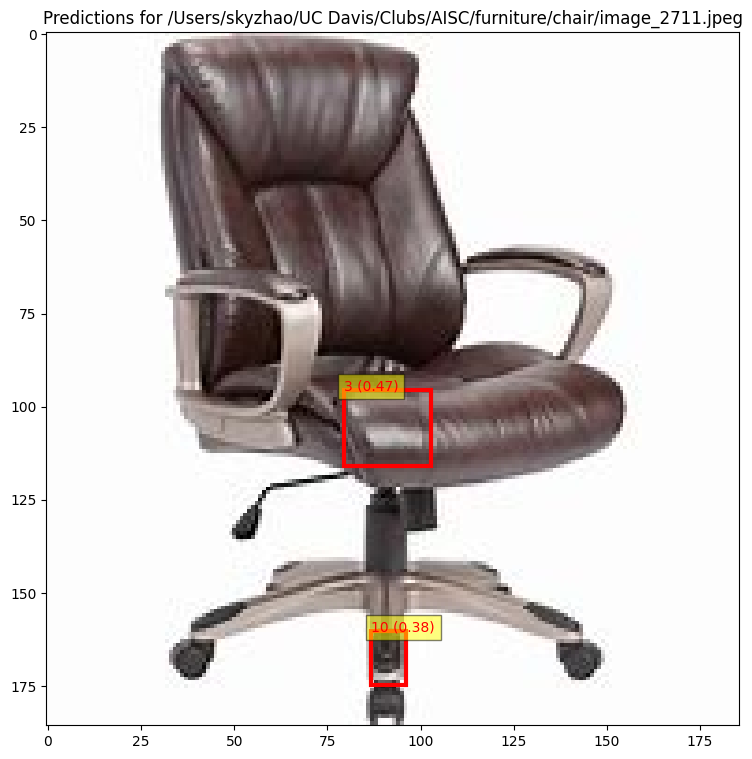

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_1097.jpeg:
Boxes: tensor([[ 10.3025,   0.0000, 188.0000, 135.5379],
        [ 74.5389,   0.4414, 188.0000, 100.3199]])
Labels: tensor([ 1, 63])
Scores: tensor([0.2928, 0.0535])


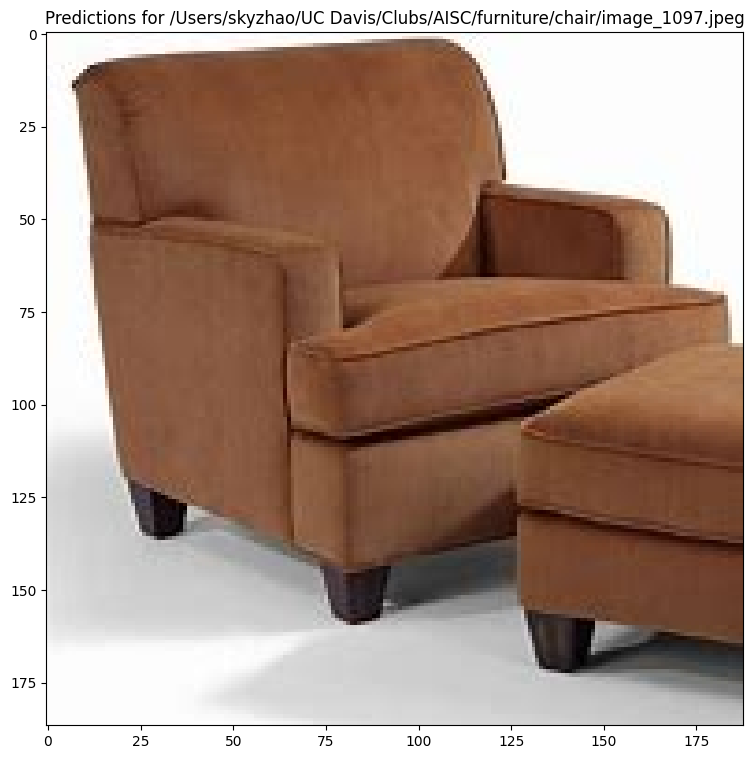

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_414.jpeg:
Boxes: tensor([[ 68.6186, 148.2845, 114.7559, 191.3078],
        [171.9923, 116.8472, 196.0000, 165.8199],
        [111.4106, 144.5977, 192.4414, 192.7986],
        [157.3817,  68.1750, 168.7034,  80.5183]])
Labels: tensor([15, 15, 15,  3])
Scores: tensor([0.8551, 0.4545, 0.1697, 0.1321])


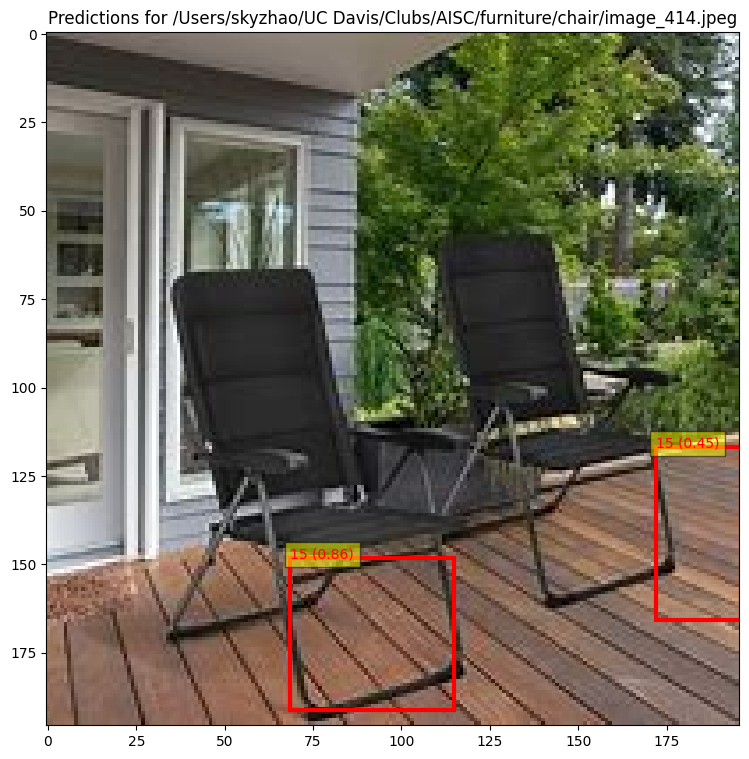

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_101.jpeg:
Boxes: tensor([[ 84.9383,   0.0000, 225.0000, 112.6493],
        [ 62.8455,   0.0000, 181.8725, 119.2982],
        [  0.0000, 144.5362, 225.0000, 220.0000],
        [ 10.4956, 145.7468, 220.3716, 220.0000],
        [ 94.2065,  58.5103, 225.0000, 220.0000],
        [ 96.4936,   0.0000, 225.0000, 154.7894],
        [  2.7060, 144.8365, 225.0000, 220.0000],
        [  0.0000,   0.0000, 116.5432, 140.0525]])
Labels: tensor([ 3,  1, 67, 51,  3, 63, 81,  3])
Scores: tensor([0.1357, 0.0825, 0.0807, 0.0676, 0.0597, 0.0565, 0.0520, 0.0506])


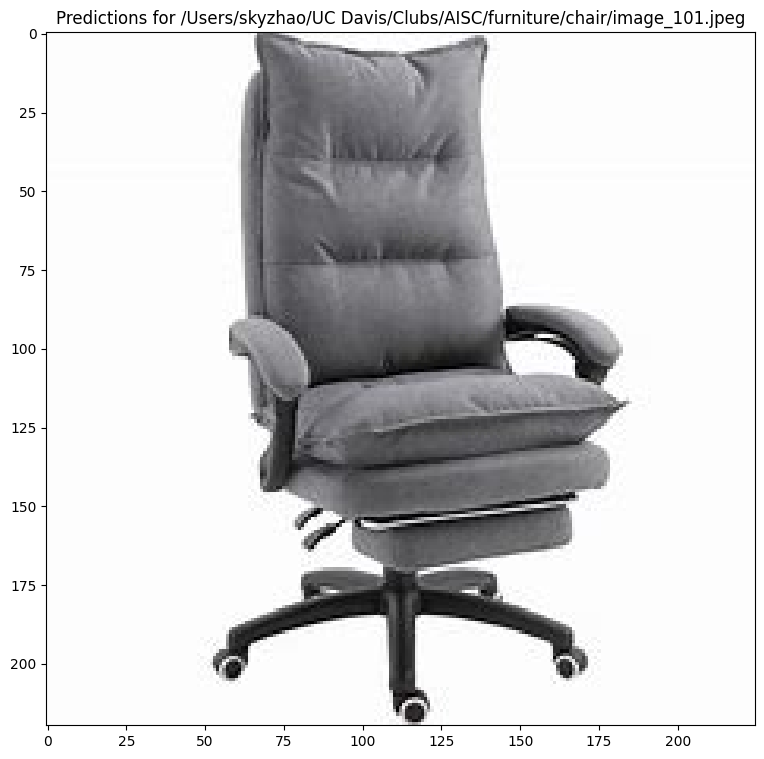

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_1428.jpeg:
Boxes: tensor([[191.7799, 184.0435, 206.1082, 196.6130],
        [142.9260, 137.9547, 165.1326, 155.6167],
        [  0.0000,  97.8436, 138.9427, 212.1743]])
Labels: tensor([10,  3, 81])
Scores: tensor([0.3514, 0.0836, 0.0529])


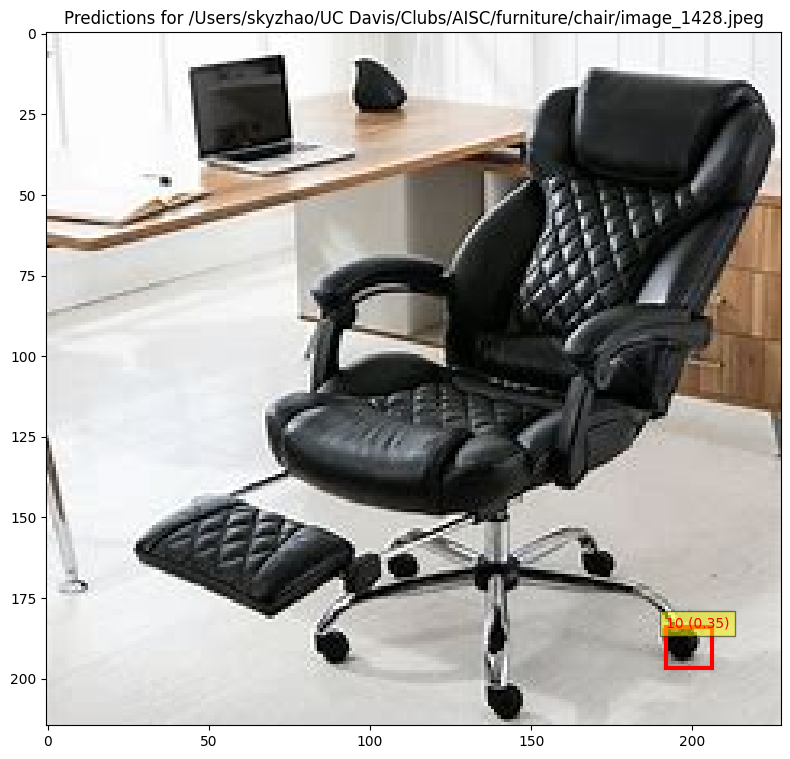

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_551.jpeg:
Boxes: tensor([[132.1681,  57.5871, 187.3646,  87.0712],
        [ 33.5459,  67.6400, 196.0000, 159.9086],
        [ 36.9911, 108.3913, 196.0000, 191.3940]])
Labels: tensor([ 3,  3, 81])
Scores: tensor([0.1120, 0.0863, 0.0665])


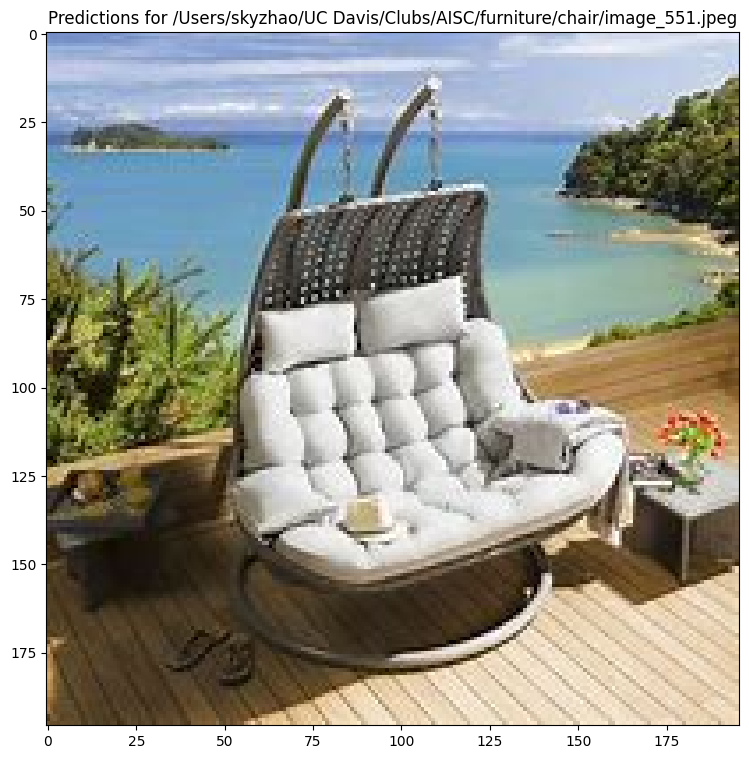

Predictions for /Users/skyzhao/UC Davis/Clubs/AISC/furniture/chair/image_1582.jpeg:
Boxes: tensor([[5.4500e+00, 1.0435e+02, 1.9800e+02, 1.9796e+02],
        [0.0000e+00, 1.0405e+02, 1.9800e+02, 1.9790e+02],
        [0.0000e+00, 9.2030e+01, 1.9800e+02, 1.9782e+02],
        [1.7995e-01, 1.0404e+02, 1.9800e+02, 1.9800e+02],
        [0.0000e+00, 6.8289e+01, 1.9800e+02, 1.9800e+02],
        [1.5234e+02, 1.6403e+02, 1.6335e+02, 1.7748e+02]])
Labels: tensor([51, 67, 63, 81,  3, 10])
Scores: tensor([0.1181, 0.1036, 0.0997, 0.0927, 0.0779, 0.0581])


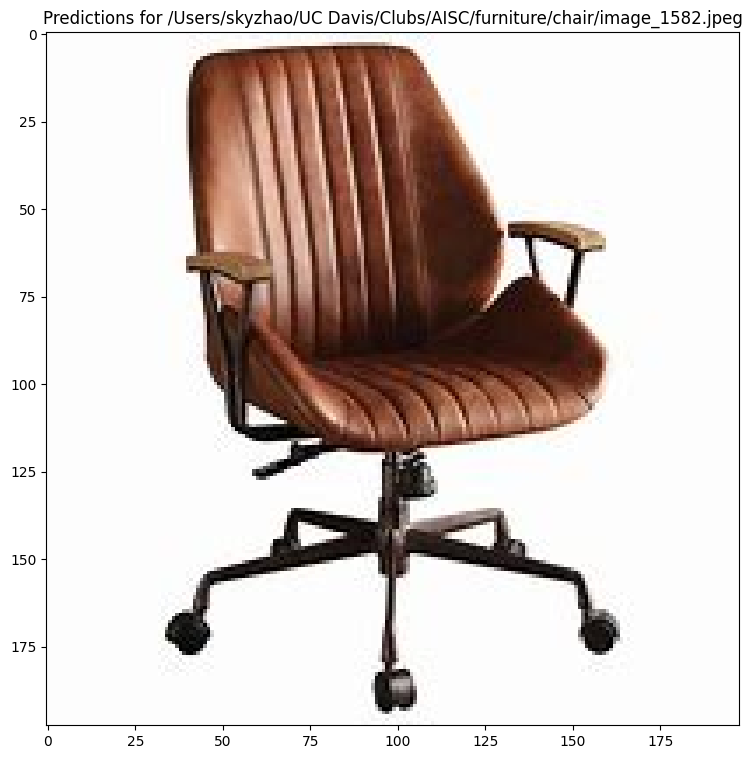

In [3]:
import os
import torch
from torchvision import models, transforms
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from PIL import Image
import matplotlib.pyplot as plt

# Define the base directory where your images are stored
base_dir = '/Users/skyzhao/UC Davis/Clubs/AISC/furniture'  # Modify this path to your folder location

# Define transformation for Faster R-CNN input
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the Faster R-CNN model (pretrained)
model = models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()  # Set model to evaluation mode

# Function to load and transform images
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Open image and convert to RGB
    return transform(image).unsqueeze(0)  # Add batch dimension

# Function to recursively find all image files in the directory
def get_all_images(base_dir):
    image_paths = []
    for root, dirs, files in os.walk(base_dir):  # Traverse through subdirectories
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Ensure it's an image
                image_paths.append(os.path.join(root, file))
    return image_paths

# Run inference on a subset of images
def run_inference(base_dir, max_images=10):
    image_paths = get_all_images(base_dir)[:max_images]  # Limit to the first 'max_images' images
    for image_path in image_paths:
        image_tensor = load_image(image_path)  # Load and transform the image
        
        with torch.no_grad():  # Disable gradient calculation for inference
            prediction = model(image_tensor)  # Run Faster R-CNN
            
        # Get predicted boxes, labels, and scores
        boxes = prediction[0]['boxes']
        labels = prediction[0]['labels']
        scores = prediction[0]['scores']
        
        print(f"Predictions for {image_path}:")
        print(f"Boxes: {boxes}")
        print(f"Labels: {labels}")
        print(f"Scores: {scores}")
        
        # Display results (only for predictions above the threshold)
        fig, ax = plt.subplots(1, figsize=(12, 9))
        ax.imshow(Image.open(image_path))  # Show the image
        
        for i in range(len(boxes)):
            if scores[i] > 0.3:  # Only display predictions with score > 0.3
                box = boxes[i].cpu().numpy()
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                           fill=False, color='red', linewidth=3))
                ax.text(box[0], box[1], f'{labels[i].item()} ({scores[i]:.2f})',
                        fontsize=10, color='red', bbox=dict(facecolor='yellow', alpha=0.5))
        
        plt.title(f"Predictions for {image_path}")
        plt.show()

# Run inference on the first 10 images
run_inference(base_dir, max_images=10)
